In [1]:
%matplotlib notebook
%config IPCompleter.greedy=True
import networkx as nx
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True
%matplotlib inline
import matplotlib.pyplot as plt

#https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html
import matplotlib.image as mpimg
from io import BytesIO

In [2]:
print('abc')

abc


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Graphtype= nx.MultiGraph()
fileName= '/usr/local/Downloads/DataSets/ticketToRide.xlsx'
#fileName= '/usr/local/Downloads/DataSets/ticketToRide_v02.xlsx'
ds1=open(fileName, "rb")
#index_col=false --> otherwise, first column is skipped
df1 = pd.read_excel(fileName, index_col=False, names=[  "city1", "distance",  "color", "tracks", "city2"]
              , dtype={"city1":"str", "distance":"int", "color":"str", "tracks":"int", "city2":"str"})
ds1.close()

print(df1.head())
type(df1)

       city1  distance color  tracks     city2
0  Vancouver         1  gray       2   Seattle
1  Vancouver         1  gray       2   Seattle
2  Vancouver         3  gray       1   Calgary
3    Seattle         1  gray       2  Portland
4    Seattle         4  gray       1   Calgary


pandas.core.frame.DataFrame

In [4]:
df1.city1.unique()

array(['Vancouver', 'Seattle', 'Calgary', 'Portland', 'Helena',
       'Winnipeg', 'San Francisco', 'Salt Lake City', 'Duluth', 'Omaha',
       'Denver', 'Sault St Marie', 'Los Angeles', 'Toronto', 'Chicago',
       'Kansas City', 'Phoenix', 'Santa Fe', 'Oklahoma City', 'Montreal',
       'El Paso', 'Pittsburgh', 'St Louis', 'Dallas', 'Little Rock',
       'Boston', 'New York', 'Raleigh', 'Nashville', 'Houston',
       'New Orleans', 'Atlanta', 'Charleston'], dtype=object)

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


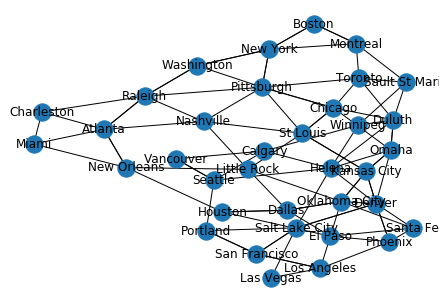

In [5]:
G_train = nx.from_pandas_edgelist(df1, source='city1'
                                  , target='city2'
                                  , edge_attr = ['distance', 'color', 'tracks']
                                 , create_using=Graphtype)
print(G_train)

nx.draw(G_train, with_labels=True)
plt.show()

#https://www.geeksforgeeks.org/directed-graphs-multigraphs-and-visualization-in-networkx/
#matplot lib doesn't easily plot multigraphs: 
#"But the visualization of Multigraph in Networkx is not clear. It fails to show multiple edges separately and these edges overlap."

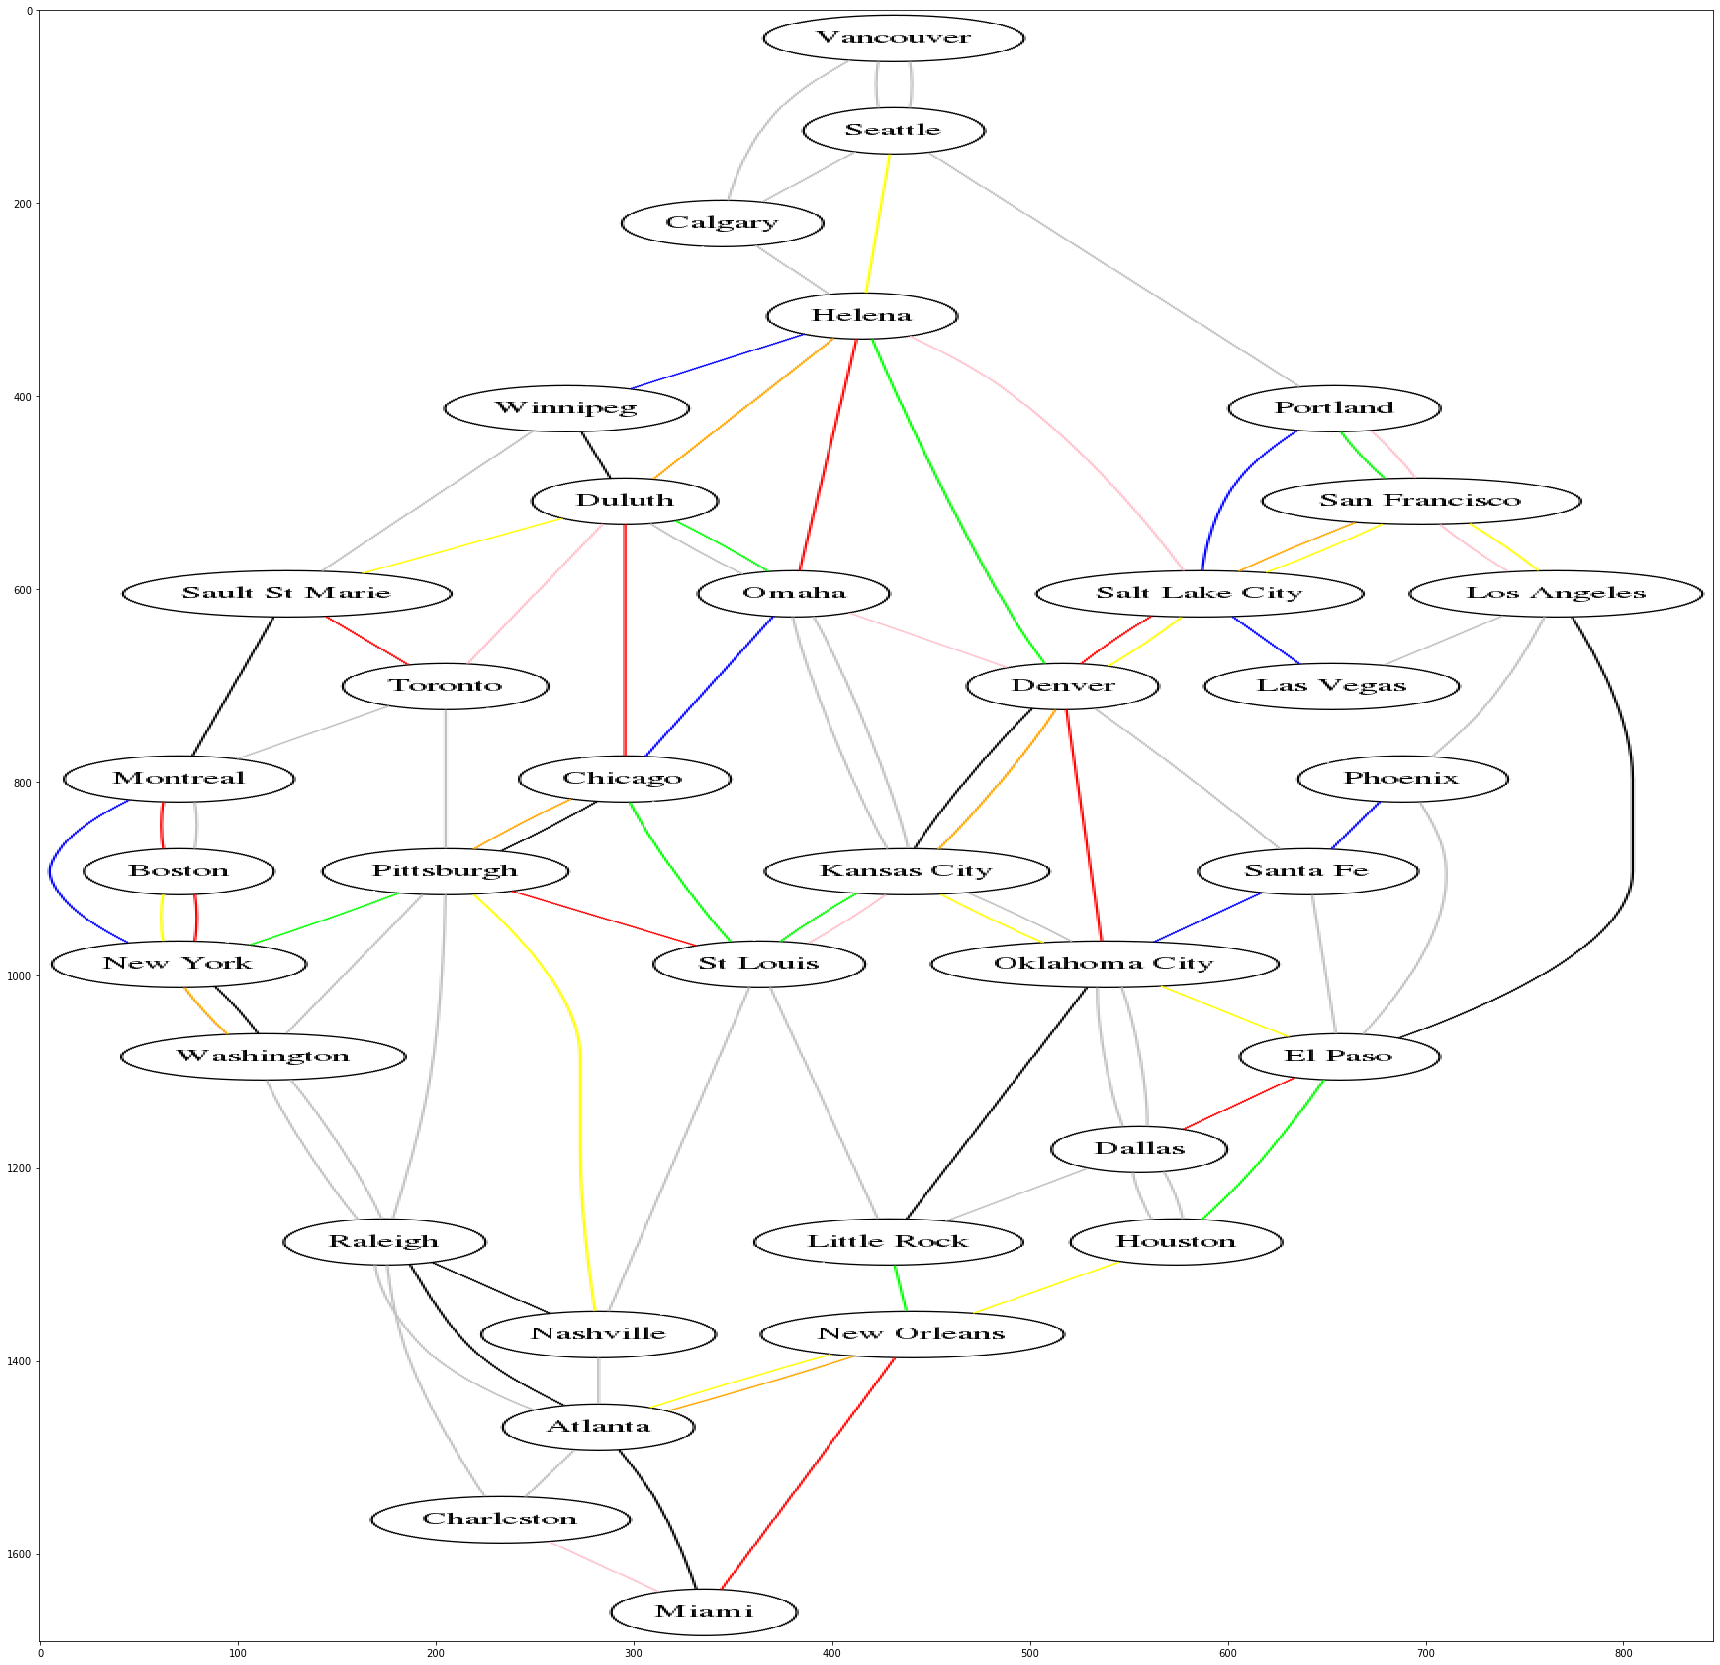

In [6]:
d = nx.drawing.nx_pydot.to_pydot(G_train) # d is a pydot graph object, dot options can be easily set
# attributes get converted from networkx,
# use set methods to control dot attributes after creation

png_str = d.create_png()
sio = BytesIO() # file-like string, appropriate for imread below
sio.write(png_str)
sio.seek(0)

img = mpimg.imread(sio)
plt.figure(figsize=(30,30))
imgplot = plt.imshow(img, aspect='auto')

#dir(d)
#d.get_edge_list()


In [7]:
G_train.edges()

MultiEdgeDataView([('Vancouver', 'Seattle'), ('Vancouver', 'Seattle'), ('Vancouver', 'Calgary'), ('Seattle', 'Portland'), ('Seattle', 'Calgary'), ('Seattle', 'Helena'), ('Calgary', 'Helena'), ('Calgary', 'Winnipeg'), ('Portland', 'San Francisco'), ('Portland', 'San Francisco'), ('Portland', 'Salt Lake City'), ('Helena', 'Salt Lake City'), ('Helena', 'Winnipeg'), ('Helena', 'Duluth'), ('Helena', 'Omaha'), ('Helena', 'Denver'), ('Winnipeg', 'Sault St Marie'), ('Winnipeg', 'Duluth'), ('San Francisco', 'Salt Lake City'), ('San Francisco', 'Salt Lake City'), ('San Francisco', 'Los Angeles'), ('San Francisco', 'Los Angeles'), ('Salt Lake City', 'Las Vegas'), ('Salt Lake City', 'Denver'), ('Salt Lake City', 'Denver'), ('Duluth', 'Sault St Marie'), ('Duluth', 'Toronto'), ('Duluth', 'Chicago'), ('Duluth', 'Omaha'), ('Duluth', 'Omaha'), ('Omaha', 'Denver'), ('Omaha', 'Kansas City'), ('Omaha', 'Kansas City'), ('Omaha', 'Chicago'), ('Denver', 'Kansas City'), ('Denver', 'Kansas City'), ('Denver', '

In [8]:
'Seattle' in G_train

True

In [9]:
#GraphViz
#https://stackoverflow.com/questions/35007046/how-to-draw-parallel-edges-in-networkx-graphviz
import graphviz

#https://pygraphviz.github.io/documentation/latest/tutorial.html
import pygraphviz as pgv
from pygraphviz import *

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


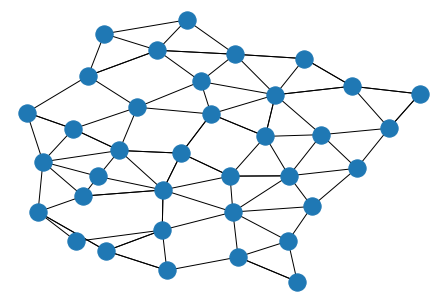

In [10]:
from networkx.drawing.nx_agraph import graphviz_layout

#https://stackoverflow.com/questions/42050042/attributeerror-module-object-has-no-attribute-write-dot-for-networkx-librar/42050074
from networkx.drawing.nx_pydot import write_dot
pos = graphviz_layout(G_train)
nx.draw(G_train, pos)


In [11]:
#import networkx as nx
#https://stackoverflow.com/questions/52515060/display-networkx-2-2-multigraphs-using-graphviz-or-pydot
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
from networkx.drawing.nx_pydot import write_dot, to_pydot

In [12]:
dot_G=to_pydot(G_train)

#to allow multigraph
dot_G.set_strict(False)
print(dot_G)

#to show all the attributes of an object
dir(to_pydot.__class__)


graph  {
Vancouver;
Seattle;
Calgary;
Portland;
Helena;
Winnipeg;
"San Francisco";
"Salt Lake City";
Duluth;
Omaha;
Denver;
"Sault St Marie";
"Los Angeles";
"Las Vegas";
Toronto;
Chicago;
"Kansas City";
Phoenix;
"Santa Fe";
"Oklahoma City";
Montreal;
"El Paso";
Pittsburgh;
"St Louis";
Dallas;
"Little Rock";
Boston;
"New York";
Houston;
Washington;
Raleigh;
Nashville;
"New Orleans";
Atlanta;
Charleston;
Miami;
Vancouver -- Seattle  [color=gray, distance=1, key=0, tracks=2];
Vancouver -- Seattle  [color=gray, distance=1, key=1, tracks=2];
Vancouver -- Calgary  [color=gray, distance=3, key=0, tracks=1];
Seattle -- Portland  [color=gray, distance=1, key=0, tracks=2];
Seattle -- Calgary  [color=gray, distance=4, key=0, tracks=1];
Seattle -- Helena  [color=yellow, distance=6, key=0, tracks=1];
Calgary -- Helena  [color=gray, distance=4, key=0, tracks=1];
Calgary -- Winnipeg  [color=white, distance=6, key=0, tracks=1];
Portland -- "San Francisco"  [color=green, distance=5, key=0, tracks=2];
P

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [13]:
A = to_agraph(G_train)


In [14]:
#doesn't work (blank)
A.layout('dot')
A.draw('abc.png')